## Assignment 05 - Risk

This notebook will simulate 1000 individual battle rounds in Risk (3 attacker vs 2 defender) and plots the result.

One battle round is one shake of the attacker and defender dice.

For extra: 
A more complicated version simulates a full series of rounds for armies of arbitrary sizes, until one side is wiped out,

and plots the results.

### Rules of Risk

In Risk one army fights another. (using 6 sided dice)

In each battle round, the attacker can put forward up to three of their troops (3 dice).

The defender can use up to two of their defending troops (2 dice).

Each side looses troops depending on the following rules:

The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)


**Examples**
|Attacker rolls|Defender Roll|Attacker Loses|Defender Loses|Explanation|
|---|---|---|---|---|
|6,4,1	|5,3	|0	|2	|6 beats 5 and 4 beats 3 (the one is ignored as the lowest)|
|6,6,6	|6,3	|1	|1	|Defenders 6 beats the attackers first 6 and the attackers second 6 beats the defenders 3|
|5,4,4	|5,4	|2	|0	|The defenders 5 beat the attackers 5 and the defenders 4 beat the attackers 4 (defender wins when the dice are the same)|


In [ ]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [ ]:
attacker_roll={}
defender_roll={}
attacker_loses_per_round=[]
defender_loses_per_round=[]
total_attacker_losses = 0
total_defender_losses = 0
results = {}

with open('battle_results.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    #Write header
    writer.writerow(['Round', 'Attacker Roll', 'Defender Roll', 'Attacker Loses', 'Defender Loses', 'Total Attacker Loses', 'Total Defender Loses'])

    i = 1 
    while i != 0 and i < 1001: 
        attacker_roll[i] = np.sort(np.random.randint(1,7,3))[::-1]
        defender_roll[i] = np.sort(np.random.randint(1,7,2))[::-1]

        attacker_loses = 0
        defender_loses = 0

        print(f'Round {i}:\n\tAttacker rolls: {attacker_roll[i]}\n\tDefender rolls: {defender_roll[i]}')
        #print(f'\tHighest attacker value = {attacker_roll[i][0]}')
        #print(f'\tHighest defender value = {defender_roll[i][0]}\n')
        r = 0
        while r < 2:
            if attacker_roll[i][r] == defender_roll[i][r]:
                attacker_loses += 1

            elif attacker_roll[i][r] > defender_roll[i][r]:
                defender_loses += 1
        
            elif defender_roll[i][r] > attacker_roll[i][r]:
                attacker_loses += 1
            
            r += 1
        
        results[f'Round {i}'] = {'Attacker loses': attacker_loses, 'Defender loses': defender_loses}
        print(f'\n\tAttacker loses: {attacker_loses}\n\tDefender loses: {defender_loses}')

        total_attacker_losses = total_attacker_losses + attacker_loses
        total_defender_losses = total_defender_losses + defender_loses
        attacker_loses_per_round.append(attacker_loses)
        defender_loses_per_round.append(defender_loses)
        
        #Write the round results to the CSV file
        writer.writerow([i, attacker_roll[i], defender_roll[i], attacker_loses, defender_loses, total_attacker_losses, total_defender_losses])

        i += 1 

    print('Results have been saved to 'battle_results.csv'')
    print(total_attacker_losses)
    print(total_defender_losses)
    #print(attacker_roll)
    #print('Results:', results)

    #print(attacker_rolls)
    #print(defender_rolls)


Round 1:
	Attacker rolls: [6 3 1]
	Defender rolls: [4 1]

	Attacker loses: 0
	Defender loses: 2
Round 2:
	Attacker rolls: [4 2 2]
	Defender rolls: [5 1]

	Attacker loses: 1
	Defender loses: 1
Round 3:
	Attacker rolls: [5 4 2]
	Defender rolls: [6 5]

	Attacker loses: 2
	Defender loses: 0
Round 4:
	Attacker rolls: [5 4 1]
	Defender rolls: [2 1]

	Attacker loses: 0
	Defender loses: 2
Round 5:
	Attacker rolls: [3 2 2]
	Defender rolls: [5 3]

	Attacker loses: 2
	Defender loses: 0
Round 6:
	Attacker rolls: [6 3 1]
	Defender rolls: [4 2]

	Attacker loses: 0
	Defender loses: 2
Round 7:
	Attacker rolls: [5 4 1]
	Defender rolls: [3 1]

	Attacker loses: 0
	Defender loses: 2
Round 8:
	Attacker rolls: [6 4 1]
	Defender rolls: [4 2]

	Attacker loses: 0
	Defender loses: 2
Round 9:
	Attacker rolls: [6 5 1]
	Defender rolls: [5 4]

	Attacker loses: 0
	Defender loses: 2
Round 10:
	Attacker rolls: [5 1 1]
	Defender rolls: [2 1]

	Attacker loses: 1
	Defender loses: 1
Round 11:
	Attacker rolls: [6 4 1]
	Def

In [ ]:
#Read in the data from the created CSV file
df = pd.read_csv('C:/Users/angel/OneDrive/College/pfda/PFDA-assignments/battle_results.csv')

Text(0.5, 1.0, 'Total losses: Defender vs. Attacker')

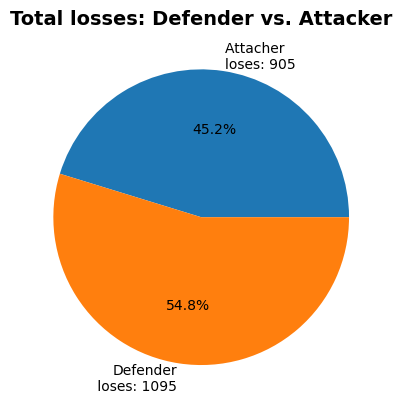

In [ ]:
#Pie chart creation to visualise the defender loses vs the attacker loses

labels = f'Attacher \nloses: {total_attacker_losses}', f'Defender\n loses: {total_defender_losses}'
sizes = [total_attacker_losses,total_defender_losses]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.set_title('Total losses: Defender vs. Attacker', fontsize=14, weight='black')


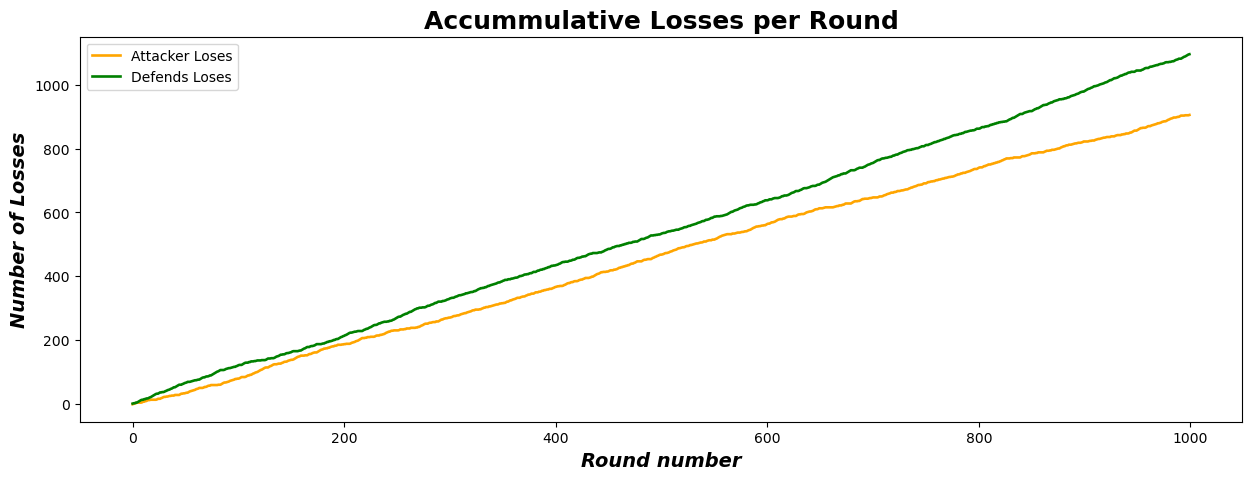

In [106]:
#Plotting accummulative losses per round 

plt.figure(figsize=(15,5)) #setting the size of the image
plt.plot(df['Total Attacker Loses'],label='Attacker Loses', marker='', linewidth=1.9, color='orange') #plotting the accummulative line in orange for the attacker
plt.plot(df['Total Defender Loses'],label='Defends Loses', marker='', linewidth=1.9, color='green') #plotting the accummulative line in green for the defender

#Set labels and title
plt.xlabel('Round number', fontsize=14, fontstyle='italic', weight='extra bold')
plt.ylabel('Number of Losses', fontsize=14, fontstyle='italic', weight='extra bold')
plt.legend()
plt.title('Accummulative Losses per Round', fontsize=18, weight='black')

#Show the plot
plt.show()


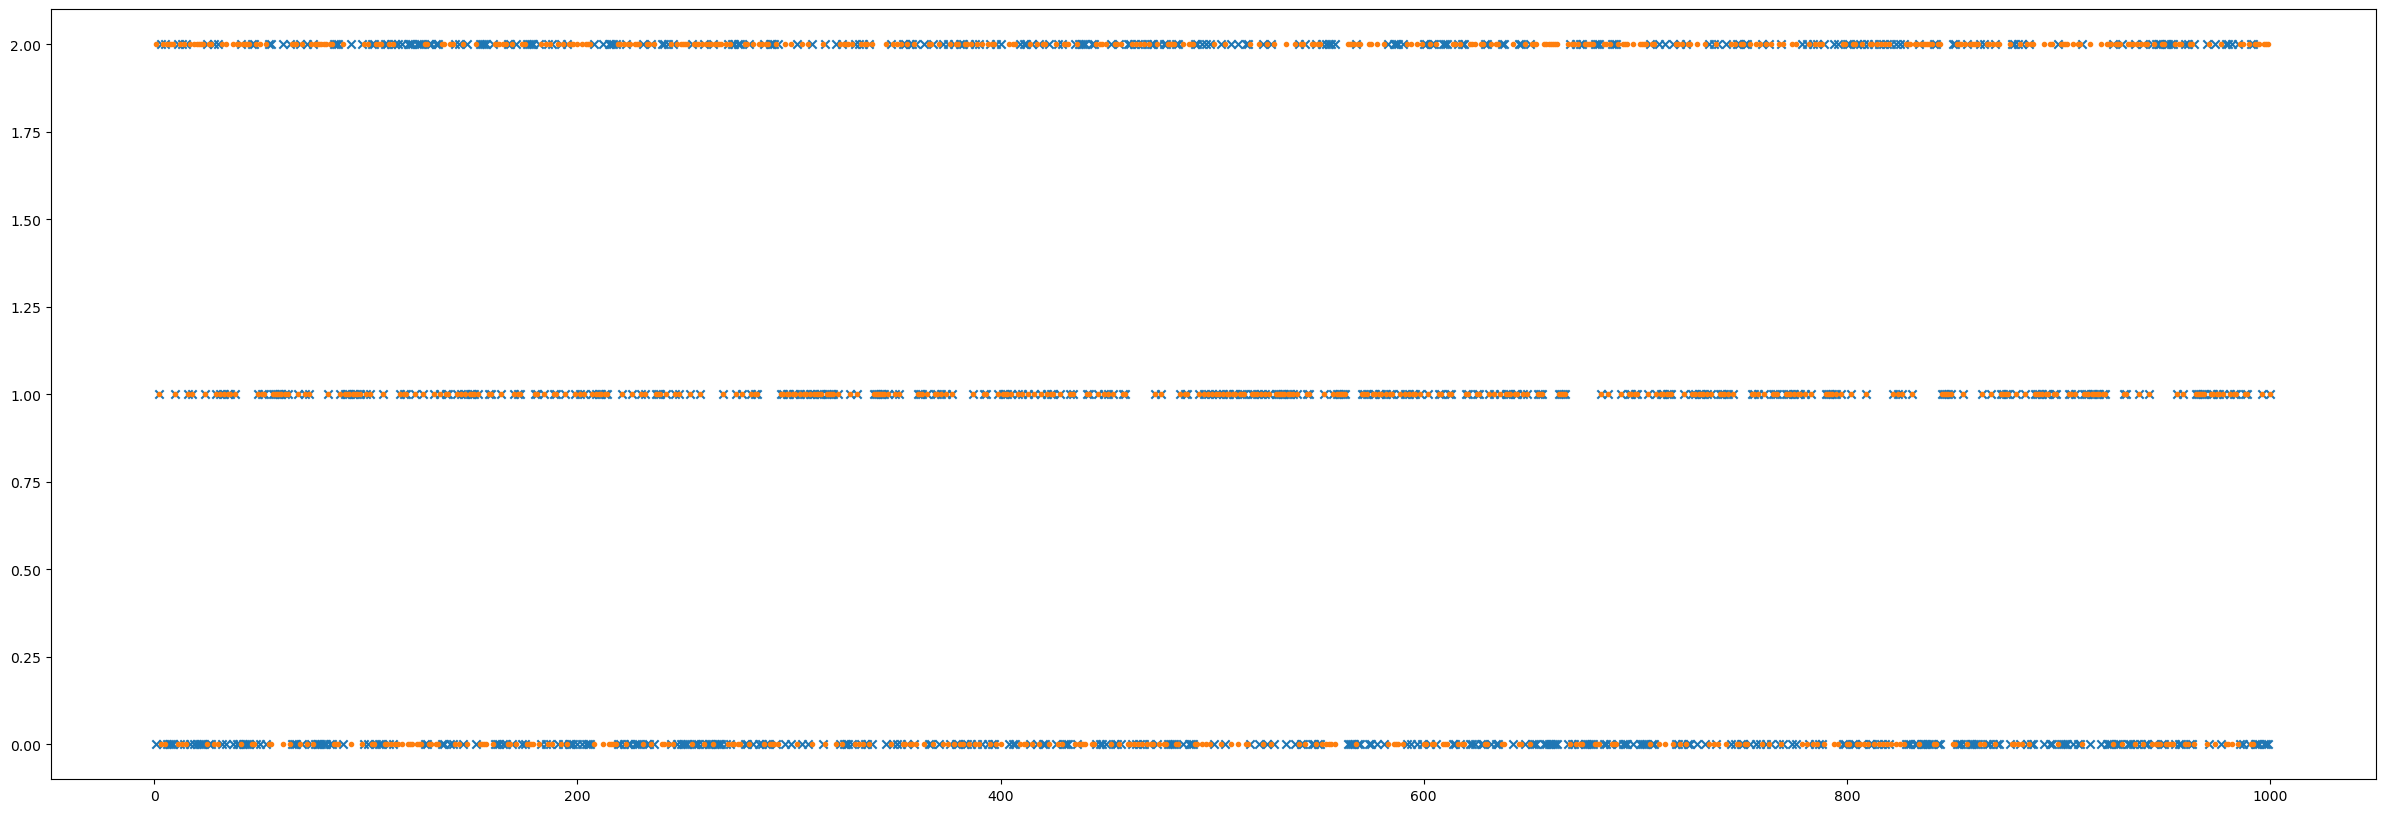

In [ ]:
#Testing scatter plot for representing the results 
plt.figure(figsize=(30,10)) #setting figure size
plt.scatter(df['Round'], df['Attacker Loses'], label='Attacker Loses', marker='x') #plotting the attacker losses per round an x on the plot
plt.scatter(df['Round'], df['Defender Loses'], label='Defender Loses', marker='.') #plotting the defender losses per round with an . on the plot

plt.show()

############## Not liking this view image > maybe remove

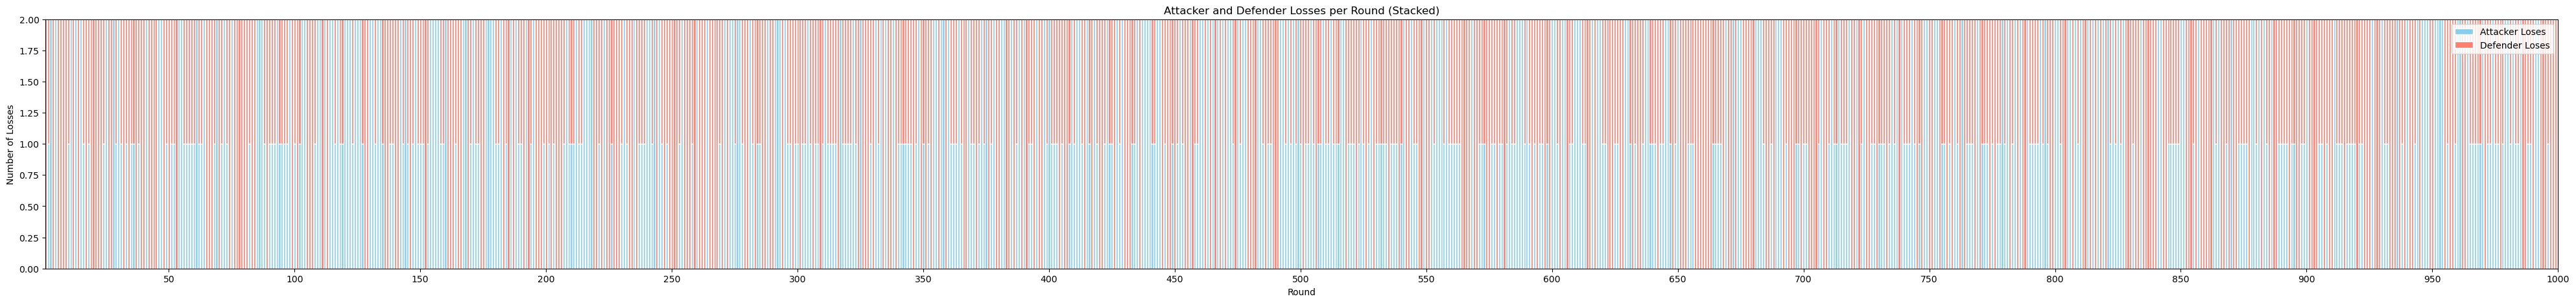

In [ ]:
#Define the x-axis (rounds) and the values for each segment (attacker and defender losses)
x = df['Round']
attacker_losses = df['Attacker Loses']
defender_losses = df['Defender Loses']

#Set a custom width for the bars
#bar_width = 1.2  #Increase this value for thicker bars
plt.figure(figsize=(50,5))

#Plot the stacked bar chart with the custom bar width
plt.bar(x, attacker_losses, edgecolor='white',label='Attacker Loses', color='skyblue')
plt.bar(x, defender_losses, edgecolor='white',bottom=attacker_losses, label='Defender Loses', color='salmon')

plt.xticks(range(0, 1001, 50))  #Display every 50 rounds on the x-axis

#Add labels and title
plt.xlim(1,1000)
plt.xlabel('Round')
plt.ylabel('Number of Losses')
plt.title('Attacker and Defender Losses per round')

#Add legend
plt.legend()

#plt.tight_layout()
plt.show()


######## Not liking how difficult it is to read the plot as one continuous plot, try splitting results over 4 plots

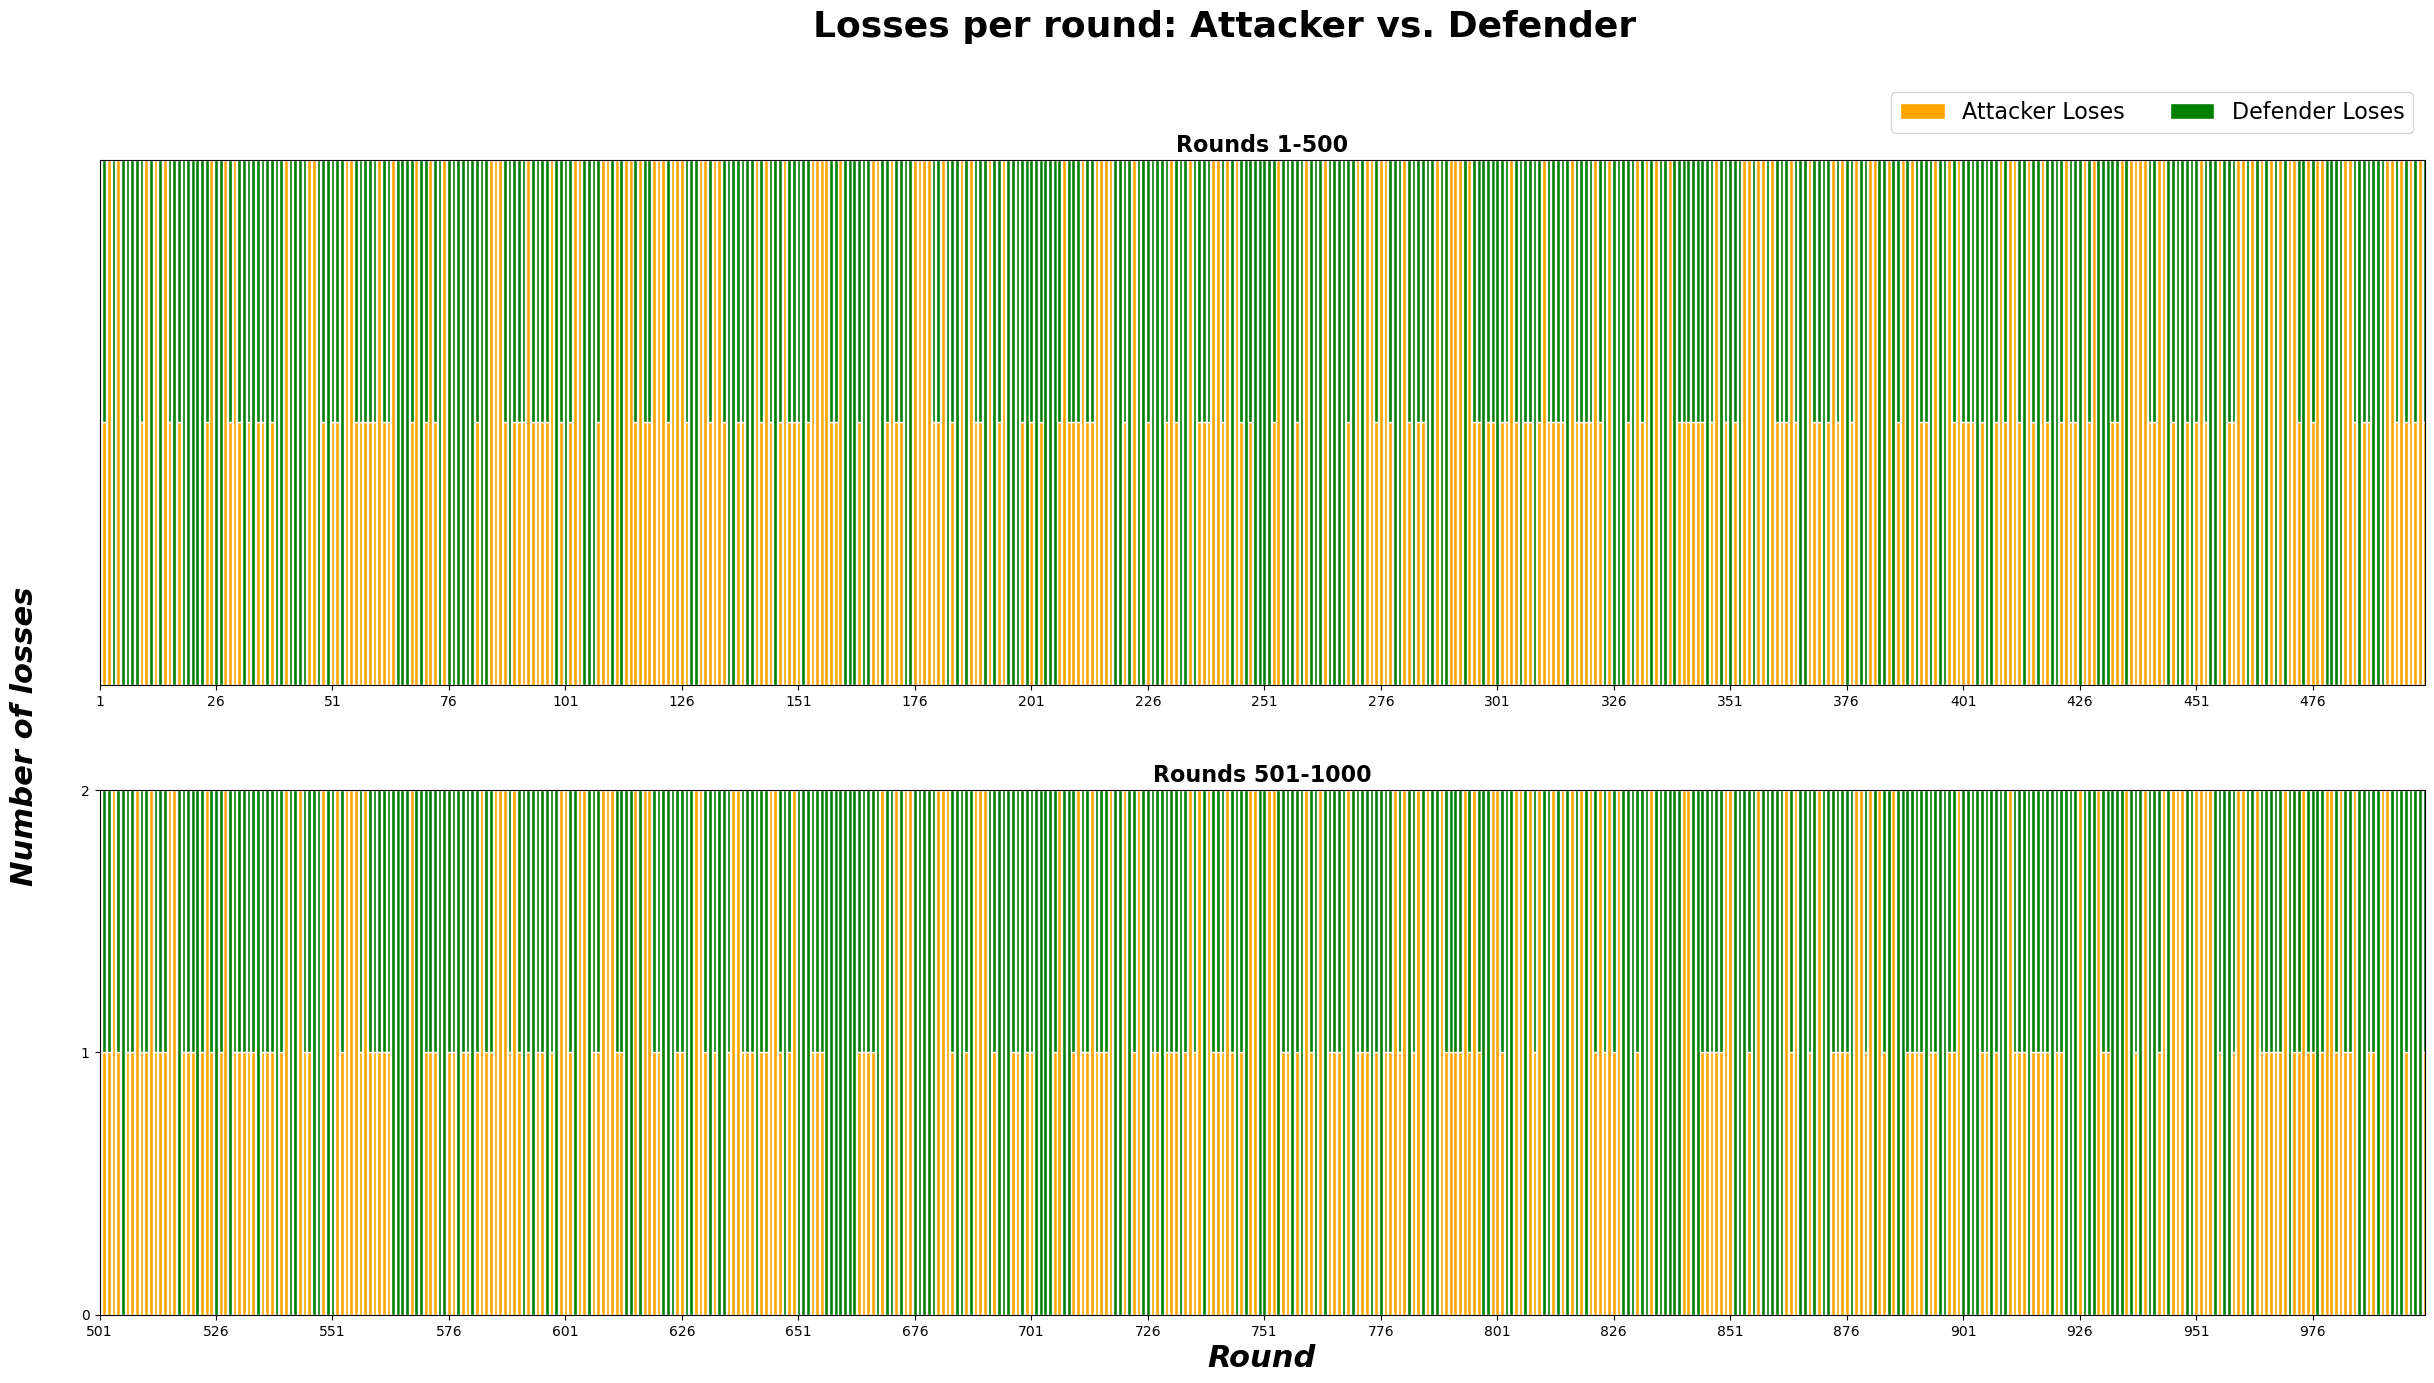

In [97]:
#creating subplots to break down the plot into two subplots to have a nicer visual

#defining the x-axis by setting up the ranges and rounds and the values for each bar
rounds = [1, 501]
ranges = [(1, 500), (501, 1000)]

plt.figure(figsize=(30, 15))  #adjusting figure size for the subplots

#creating a loop to iterate over the data for the specific ranges defined above and create a subplot using only the filtered data
for i, (start, end) in enumerate(ranges):
    #filtering the data for each range
    x = df['Round'][(df['Round'] >= start) & (df['Round'] <= end)]
    attacker_losses = df['Attacker Loses'][(df['Round'] >= start) & (df['Round'] <= end)]
    defender_losses = df['Defender Loses'][(df['Round'] >= start) & (df['Round'] <= end)]
    
    #creating the subplots in a 2x2 grid
    plt.subplot(2, 1, i + 1)
    
    #plotting the stacked bar chart for each range
    plt.bar(x, attacker_losses, edgecolor='white', label='Attacker Loses', color='orange') #setting the colour, title and label for the legend
    plt.bar(x, defender_losses, edgecolor='white', bottom=attacker_losses, label='Defender Loses', color='green') #setting the colour, title and label for the legend

    #setting the x-axis ticks for each subplot
    plt.xticks(range(start, end +1, 25))  #display every 25 rounds on the x-axis, using the values in the ranges for the iteration 
    plt.yticks(range(0,3,1))

        #Add labels, title, and limits for each subplot
    plt.xlim(start, end)
    plt.xlabel('Round', fontsize=22, fontstyle='italic', weight='extra bold')
    plt.title(f'Rounds {start}-{end}', fontsize=16, weight= 'bold')
    if i == 0: 
        plt.yticks([])
        plt.xlabel('')

    #Add legend only on the first subplot for clarity
    if i == 0:
        plt.legend(loc = 'upper right', ncols = 2, bbox_to_anchor=(1, 1.15),fontsize=16)
        plt.figtext(0.1, 0.4, 'Number of losses', ha='center', fontsize=22, fontstyle='italic', rotation = 'vertical', weight='extra bold')
        plt.suptitle('Losses per round: Attacker vs. Defender', fontsize=26, weight='black')

plt.show()


What do I want to plot? 

piechart showing loses for attacker vs loses for defender  
subplots = stacked bar chart showing the loses per round   
line = accummulative losses over the rounds